<a href="https://colab.research.google.com/github/O-Kpy/Dacon/blob/main/2021_05_25_kaggle_Kannada_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0_loss_%EC%A4%84%EC%9D%B4%EA%B8%B0_%EC%99%84%EB%A3%8C_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [2]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [ ]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item() # preds행렬 열중에 가장 큰 수의 인덱스를 합하고 그 값을 빼낸다.

In [ ]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [3]:
train_set = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/Kannada - PyTorch & Visualizations/train.csv')
test_images = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/Kannada - PyTorch & Visualizations/test.csv')
val_set = pd.read_csv('/content/drive/MyDrive/dataset/kaggle/Kannada - PyTorch & Visualizations/Dig-MNIST.csv')
train_set = pd.concat([train_set, val_set], axis=0)

In [4]:
train_images, val_images, train_labels, val_labels = train_test_split(train_set.iloc[:,1:],
                                                                      train_set.iloc[:,0],
                                                                      test_size=0.25)
train_images.reset_index(drop=True, inplace=True)
val_images.reset_index(drop=True, inplace=True)
train_labels.reset_index(drop=True, inplace=True)
val_labels.reset_index(drop=True, inplace=True)

In [ ]:
train_images, val_images, train_labels, val_labels = train_test_split(train_set.iloc[:,1:],
                                                                      train_set.iloc[:,0],
                                                                      test_size=0.1)

train_images.reset_index(drop=True, inplace=True)
val_images.reset_index(drop=True, inplace=True)
train_labels.reset_index(drop=True, inplace=True)
val_labels.reset_index(drop=True, inplace=True)

In [ ]:
# train, test 나누기
train_images, val_images, train_labels, val_labels = train_test_split(train_set.iloc[:,1:],
                                                                      train_set.iloc[:,0],
                                                                      test_size=0.2, shuffle=True)

train_images.reset_index(drop=True, inplace=True)
val_images.reset_index(drop=True, inplace=True)
train_labels.reset_index(drop=True, inplace=True)
val_labels.reset_index(drop=True, inplace=True)

In [5]:
test_images = test_images.iloc[:,1:]

In [ ]:
test_images = test_images.iloc[:,1:] # id 제외

In [6]:
pd.set_option('display.max_columns', 28)
pd.DataFrame(train_images.iloc[0,:].to_numpy().reshape(28,28))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,0,0,255,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,255,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,0,255,255,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
pd.DataFrame(train_set.drop(columns='label').iloc[0,:].to_numpy().reshape(28, 28))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,21,234,255,255,149,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,21,234,255,255,231,148,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,40,167,247,255,255,255,191,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,50,154,255,255,164,134,184,221,121,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,48,154,234,172,172,43,0,72,172,172,0,0,0,0,0,0,0,0


In [ ]:
pd.set_option('display.max_columns', 28)
pd.DataFrame(train_images.iloc[10,:].to_numpy().reshape(28,28))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,155,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,45,179,179,225,155,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,87,128,159,250,150,205,205,105,5,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,121,179,179,172,32,108,209,209,9,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,26,8,0,0,0,0,15,105,188,8,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,229,74,0,0,0,0,139,149,21,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,255,82,0,0,0,0,155,155,0,0,0,0,0,0,0,0,0,0,0


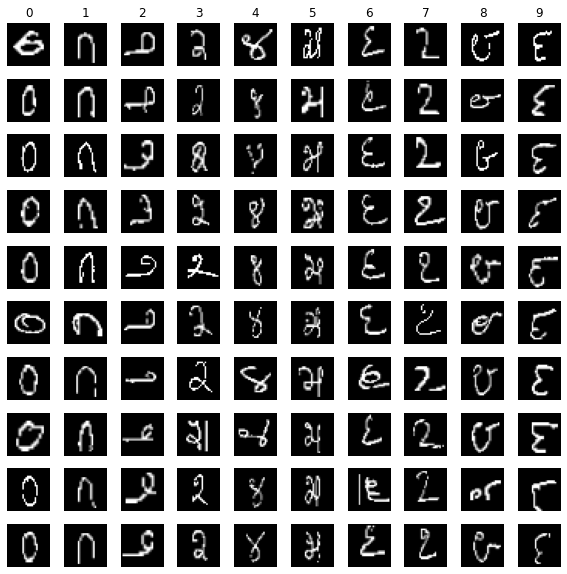

In [30]:
fig, ax = plt.subplots(10, 10, figsize=(10,10))
fig.subplots_adjust(hspace=0.3)
for i in range(10):
  ax[0][i].set_title(i)
  num_i = train_images[train_labels==i]
  for j in range(10):
    ax[j][i].axis('off')
    ax[j][i].imshow(num_i.iloc[j,:].to_numpy().reshape(28,28), cmap='gray')
    

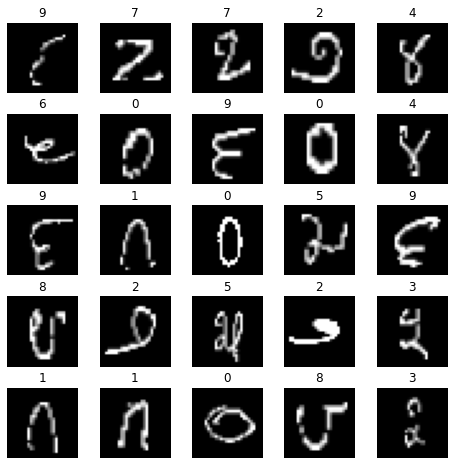

In [ ]:
fig, ax = plt.subplots(5, 5, figsize=(8,8))
fig.subplots_adjust(hspace=.3)
for i in range(5):
  for j in range(5):
    ax[i][j].axis('off')
    ax[i][j].imshow(train_images.iloc[[i+(j*5)], :].to_numpy().astype(np.uint8).reshape(-1,28), cmap='gray')
    ax[i][j].set_title(train_labels[i+(j*5)])

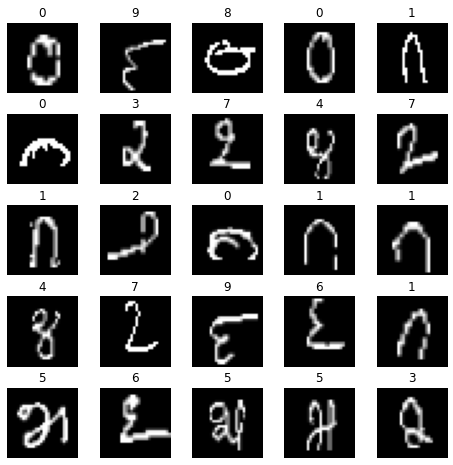

In [ ]:
fig, ax = plt.subplots(5, 5, figsize=(8,8))
fig.subplots_adjust(hspace=.3)
for i in range(5):
  for j in range(5):
    ax[i][j].axis('off')
    ax[i][j].imshow(train_images.iloc[[i+(j*5)], :].to_numpy().astype(np.uint8).reshape(28,28), cmap='gray')
    ax[i][j].set_title(train_labels[i+(j*5)])

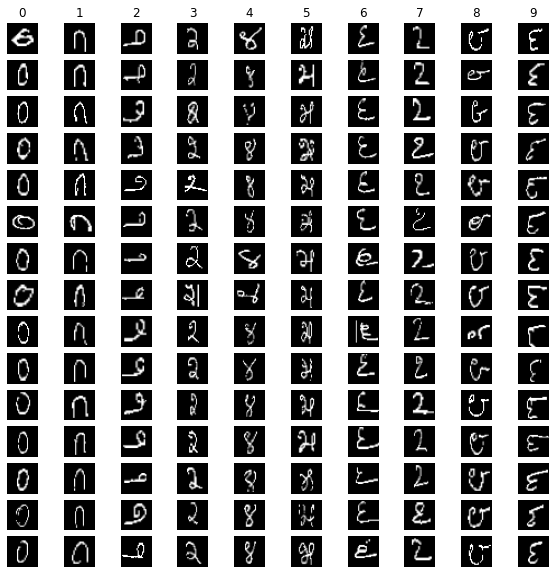

In [35]:
fig, ax = plt.subplots(15, 10, figsize=(10,10))

for i in range(10):
  num_i = train_images[train_labels == i]
  ax[0][i].set_title(i)
  for j in range(15):
    ax[j][i].axis('off')
    ax[j][i].imshow(num_i.iloc[j, :].to_numpy().astype(np.uint8).reshape(28,28), cmap='gray')

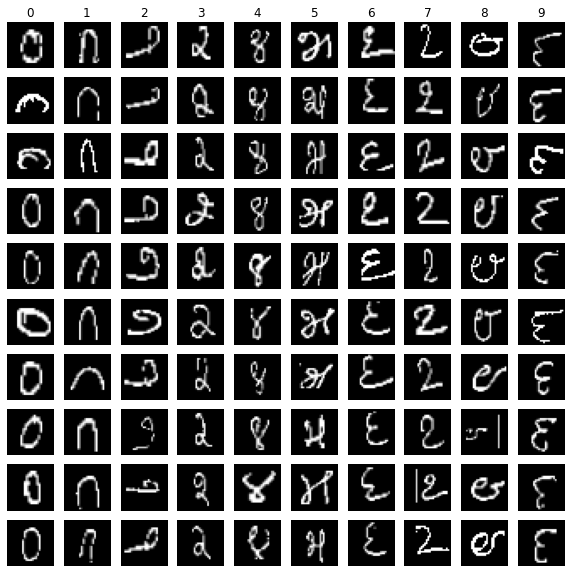

In [ ]:
# 순서대로 나열 visualization
fig, ax = plt.subplots(10, 10, figsize=(10,10))

for i in range(10):
  num_i = train_images[train_labels == i]
  ax[0][i].set_title(i)
  for j in range(10):
    ax[j][i].axis('off')
    ax[j][i].imshow(num_i.iloc[j, :].to_numpy().astype(np.uint8).reshape(28, 28), cmap='gray')

# 이미지 변형하기(Transforming)

In [37]:
img_size = 28
# torch vision 사용
train_trans = transforms.Compose(([
                                   transforms.ToPILImage(),  # csv 파일로 데이터셋을 받을 경우, PIL image로 바꿔준다.
                                   transforms.CenterCrop(img_size), # 이미지를 랜덤으로 아무데나 잘라 size 크기로 출력한다. ==> size대로 자르기
                                   transforms.RandomAffine(degrees=5, translate=(0.1, 0.1)), # 랜덤으로 affine 변형을 한다.
                                   transforms.ToTensor()
]))
# transforms.RandomRotation(degrees) 이미지를 랜덤으로 degrees 각도로 회전한다.
val_trans = transforms.Compose(([
                                 transforms.ToPILImage(),
                                 transforms.ToTensor()
]))

In [ ]:
img_size= 28

train_trans = transforms.Compose(([
                                   transforms.ToPILImage(),
                                   transforms.RandomCrop(img_size),
                                   transforms.RandomAffine(degrees=5, translate=(0.1, 0.1)),
                                   transforms.ToTensor()
]))  # torchvision은 넘파이나 텐서를 비전으로 볼수있게 Compose(transforms)시켜준다.

val_trans = transforms.Compose(([
                                 transforms.ToPILImage(),
                                 transforms.ToTensor()
]))

In [ ]:
# Transformations

img_size = 28 # size of images in MNIST
# Also the images only have one color channel
# So 3D size = (1, 28, 28)

# Transformations for the train
train_trans = transforms.Compose(([
    transforms.ToPILImage(),
    transforms.RandomCrop(img_size),
    transforms.RandomAffine(degrees=5, translate=(0.1, 0.1)),
    transforms.ToTensor(), # divides by 255
  #  transforms.Normalize((0.5,), (0.5,))
]))

# Transformations for the validation & test sets
val_trans = transforms.Compose(([
    transforms.ToPILImage(),
    transforms.ToTensor(), # divides by 255
   # transforms.Normalize((0.1307,), (0.3081,))
]))

# 변형된(tochvision으로) 데이터 셋 만들기

In [38]:
class KannadaDataSet(torch.utils.data.Dataset):
  def __init__(self, images, labels, transforms=None):
    self.X = images
    self.y = labels
    self.transforms = transforms

  def __len__(self):
    return len(self.X)
  
  def __getitem__(self, i):
    data=self.X.iloc[i,:]
    data=np.array(data).astype(np.uint8).reshape(28,28,1)

    if self.transforms:
      data = self.transforms(data)
    
    if self.y is not None:
      return (data, self.y[i])
    else:
      return data

In [ ]:
class KannadaDataSet(torch.utils.data.Dataset):
  def __init__(self, images, labels, transforms=None):
    self.X = images
    self.y = labels
    self.transforms = transforms

  def __len__(self):
    return len(self.X)


  def __getitem__(self, i):
    data = self.X.iloc[i,:]
    data = np.array(data).astype(np.uint8).reshape(28, 28, 1)

    if self.transforms:
      data = self.transforms(data)

    if self.y is not None:
      return (data, self.y[i])
    else:
      return data

In [ ]:
class KannadaDataSet(torch.utils.data.Dataset):
    # images df, labels df, transforms
    # uses labels to determine if it needs to return X & y or just X in __getitem__
    def __init__(self, images, labels, transforms=None):
        self.X = images
        self.y = labels
        self.transforms = transforms
                    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, i):
        data = self.X.iloc[i, :] # gets the row
        # reshape the row into the image size 
        # (numpy arrays have the color channels dim last)
        data = np.array(data).astype(np.uint8).reshape(28, 28, 1) 
        
        # perform transforms if there are any
        if self.transforms:
            data = self.transforms(data)
        
        # if !test_set return the label as well, otherwise don't
        if self.y is not None: # train/val
            return (data, self.y[i])
        else: # test
            return data

In [44]:
train_set = KannadaDataSet(train_images, train_labels, train_trans)
val_set = KannadaDataSet(val_images, val_labels, val_trans)
test_set = KannadaDataSet(test_images, None, val_trans)

num_classes=10

In [ ]:
# Get datasets using the custom Kannada MNIST Dataset for the train, val, and test images
train_set = KannadaDataSet(train_images, train_labels, train_trans)
val_set = KannadaDataSet(val_images, val_labels, val_trans)
test_set = KannadaDataSet(test_images, None, val_trans)

num_classes = 10 # 1-10

# 모델 만들기

파이토치는 모델을 자기가 만들어야되네 마인크래프트처럼

In [45]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        # image starts as (1, 28, 28)
        # Formula to compute size of image after conv/pool
        # (size-filter+2*padding / stride) + 1
        #                      inputs         # of filters    filter size    
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, stride=1, padding=2) # conv1
        self.conv1_bn = nn.BatchNorm2d(num_features=32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=1, padding=2) # conv2
        self.conv2_bn = nn.BatchNorm2d(num_features=64)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels= 128, kernel_size=3, stride=1, padding=1) # conv3 # 정규화 대신 함 compose에서 Normalization 대신
        self.conv3_bn = nn.BatchNorm2d(num_features=128)
        # 사이즈가 28 -> 32 -> 64 -> 128로 늘어감
        self.fc1 = nn.Linear(in_features=128*6*6, out_features=1024) # linear 1
        self.fc1_bn = nn.BatchNorm1d(num_features=1024)
        self.fc2 = nn.Linear(in_features=1024, out_features=512) # linear 2
        self.fc2_bn = nn.BatchNorm1d(num_features=512)
        self.fc3 = nn.Linear(in_features=512, out_features=256) # linear 3
        self.fc3_bn = nn.BatchNorm1d(num_features=256)
        self.fc4 = nn.Linear(in_features=256, out_features=64) # linear 4
        self.fc4_bn = nn.BatchNorm1d(num_features=64)
        self.out = nn.Linear(in_features=64, out_features=10) # output
    
    def forward(self, t):
        t = F.relu(self.conv1_bn(self.conv1(t)))
        t = F.max_pool2d(t, kernel_size=2, stride=2) # (1, 14, 14)
        
        t = F.relu(self.conv2_bn(self.conv2(t)))
        t = F.max_pool2d(t, kernel_size=2, stride=2) # (1, 7, 7)
        
        t = F.relu(self.conv3_bn(self.conv3(t)))
        t = F.max_pool2d(t, kernel_size=2, stride=1) # (1, 6, 6)
        
        t = F.relu(self.fc1_bn(self.fc1(t.reshape(-1, 128*6*6))))
        t = F.relu(self.fc2_bn(self.fc2(t)))
        t = F.relu(self.fc3_bn(self.fc3(t)))
        t = F.relu(self.fc4_bn(self.fc4(t)))
        t = self.out(t)
        
        return t

In [48]:
batch_size=100
epochs=20

network = Network().to(device)
train_dl = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_set, batch_size=batch_size, shuffle=False)
optimizer = optim.AdamW(network.parameters())
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer=optimizer, T_0=epochs // 6, verbose=True)

for epoch in range(epochs):
  print('Epoch:', epoch+1)
  epoch_loss=0
  epoch_correct=0
  network.train()

  for idx, (images, labels) in enumerate(train_dl):
    X, y = images.to(device), labels.to(device)
    y_ = network(X)

    optimizer.zero_grad()
    loss = F.cross_entropy(y_, y)
    loss.backward()
    optimizer.step()
    scheduler.step(epoch + idx/len(train_dl))

    epoch_loss += loss.item() * batch_size
    epoch_correct += get_num_correct(y_, y)

    with torch.no_grad():
      network.eval()
      val_loss=0
      val_correct=0
      for images, labels in val_dl:
        X, y = images.to(device), labels.to(device)
        preds =  network(X)
        loss = F.cross_entropy(preds, y)
        val_correct += get_num_correct(preds, y)
        val_loss = loss.item()*batch_size

  print('Val loss:', val_loss)
  print('Val Acc:', (val_correct/len(val_images))*100)

Epoch     0: adjusting learning rate of group 0 to 1.0000e-03.
Epoch: 1
Val loss: 1.7986800521612167
Val Acc: 97.97266514806378
Epoch: 2
Val loss: 0.17595732351765037
Val Acc: 98.78132118451025
Epoch: 3


KeyboardInterrupt: ignored

In [ ]:
lr = 0.001
batch_size= 100
epochs = 20

network = Network().to(device)
train_dl = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_set, batch_size=batch_size, shuffle=False)
optimizer = optim.AdamW(network.parameters(), lr=5e-3, weight_decay=7.8e-2)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=epochs // 6, eta_min=4e-4)

for epoch in range(epochs):
  print('Epoch:', epoch+1)
  epoch_loss = 0
  epoch_correct = 0
  network.train()

  for idx, (images, labels) in enumerate(train_dl):
    X, y = images.to(device), labels.to(device)
    y_ = network(X)

    optimizer.zero_grad()  # optimizer 0 셋팅
    loss = F.cross_entropy(y_, y)  # computes the loss
    loss.backward()  # computes the gradients
    optimizer.step()  # updates weights
    scheduler.step(epoch + idx / len(train_dl))

    epoch_loss += loss.item() * batch_size
    epoch_correct += get_num_correct(y_, y)

  with torch.no_grad():
    network.eval()
    val_loss = 0
    val_correct = 0
    for images, labels in val_dl:
      X, y = images.to(device), labels.to(device)
      preds = network(X)
      loss = F.cross_entropy(preds, y)
      
      val_correct += get_num_correct(preds, y)
      val_loss = loss.item()*batch_size

  print('Val loss:', val_loss)
  print('Val Acc:', (val_correct/len(val_images))*100)

Epoch: 1
Val loss: 9.255645424127579
Val Acc: 98.43394077448747
Epoch: 2
Val loss: 4.57543171942234
Val Acc: 99.00341685649204
Epoch: 3
Val loss: 3.063315339386463
Val Acc: 99.18137813211845
Epoch: 4
Val loss: 9.897610545158386
Val Acc: 98.78274487471526
Epoch: 5
Val loss: 3.660259023308754
Val Acc: 99.08883826879271
Epoch: 6
Val loss: 1.932627148926258
Val Acc: 99.34510250569475
Epoch: 7
Val loss: 11.401378363370895
Val Acc: 98.83257403189066
Epoch: 8
Val loss: 9.90339145064354
Val Acc: 99.28815489749431
Epoch: 9
Val loss: 1.071398239582777
Val Acc: 99.43052391799544
Epoch: 10
Val loss: 2.604403533041477
Val Acc: 98.57630979498862
Epoch: 11
Val loss: 4.097172245383263
Val Acc: 99.2739179954442
Epoch: 12
Val loss: 3.0449414625763893
Val Acc: 99.43052391799544
Epoch: 13
Val loss: 7.463932037353516
Val Acc: 98.69020501138952
Epoch: 14
Val loss: 2.24701464176178
Val Acc: 99.28103644646924
Epoch: 15
Val loss: 0.464626494795084
Val Acc: 99.50170842824602
Epoch: 16
Val loss: 7.77382776141166

**transforms 할때 RandomCrop해서 loss가 많이 나온것**


---



# Cross Entropy란?
Cross Entropy Loss는 보통 **Classification에서 많이 사용**됩니다. 보통 위 그림과 같이 Linear Model (딥러닝 모델)을 통해서 최종값 (Logit 또는 스코어)이 나오고, Softmax 함수를 통해 이 값들의 범위는 [0,1], 총 합은 1이 되도록 합니다. 그 다음, 1-hot Label (정답 라벨)과의 Cross Entropy를 통해 Loss를 구하게 되죠.
정답 클래스에 해당하는 스코어에 대해서만 로그합을 구하여 최종 Loss를 구하게 됩니다

# Mean Squared Error란?
Mean Squared Error (줄여서 MSE) 는 딥러닝에서 제가 가장 많이 사용했었던 loss 입니다. classification에서도 Cross-Entropy 대신 사용하기도 하고, denoising과 같은 image restoration task 에서는 image 간의 차이나 segmentation 에서는 mask 간의 차이를 구하기 위해 많이 사용합니다.
저희가 두 점 사이의 거리를 구하기 위해 사용했던 식을 생각하면 될 것 같습니다. 식은 다음과 같습니다. 여기서 output은 예측값, target은 정답값입니다.

# BCEloss란?
만약** class 가 2개인 binary case인 경우에는 BCELoss를 사용하시는 것이 좋습니다.**
하지만, BCELoss에서는 CrossEntropyLoss와 같이 softmax를 포함한 것이 아닌, Cross Entropy만 구합니다. 따라서, 이 loss를 사용하는 경우엔 softmax 또는 다른 activation function을 따로 적용해주어야 합니다.
이 경우에는 binary class이기 때문에 input과 target 모두 (minibatch, ) shape을 갖습니다. 각 minibatch 마다 input 값의 range는 [0,1]이 될 것이고, target 값은 0 또는 1이 될 것입니다.

# BCEWithLogitsLoss란?
이 loss는 위에서 소개한 BCELoss 앞에 Sigmoid layer 를 더한 것입니다. (Sigmoid + BCELoss) 따라서 따로 sigmoid 나 softmax를 해줄 필요가 없습니다.
만약 Sigmoid를 사용한다면, Sigmoide 와 BCELoss를 사용하는 것 보다는 BCEWithLogitsLoss를 사용하는 것이 더 안정적이라고 합니다.





In [ ]:
pip install optuna

     |████████████████████████████████| 296kB 11.5MB/s 
     |████████████████████████████████| 174kB 27.3MB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 81kB 8.9MB/s 
     |████████████████████████████████| 112kB 28.0MB/s 
     |████████████████████████████████| 143kB 21.8MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=dbe40f5adbe06503abb62c3921c364b943f458404da0e797f6e9073c4557a3e7
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [ ]:
import optuna
from lightgbm import LGBMClassifier
from optuna import Trial
from optuna.samplers import TPESampler

def objective(trial: Trial) -> float:
  batch_size= 100
  epochs = 10

  network = Network().to(device)
  train_dl = DataLoader(train_set, batch_size=batch_size, shuffle=True)
  val_dl = DataLoader(val_set, batch_size=batch_size, shuffle=False)

  optimizer_name = trial.suggest_categorical("optimizer", ["AdamW", "RMSprop"])
  lr = trial.suggest_loguniform("lr", 1e-5, 1e-1)
  optimizer = getattr(optim, optimizer_name)(network.parameters(), lr=lr)
  eta_min = trial.suggest_loguniform('eta_min', 1e-5, 1e-1)
  scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=epochs // 6, eta_min=eta_min)


  for epoch in range(epochs):
    print('Epoch:', epoch+1)
    epoch_loss = 0
    epoch_correct = 0
    network.train()

  for idx, (images, labels) in enumerate(train_dl):
    X, y = images.to(device), labels.to(device)
    y_ = network(X)
    
    optimizer.zero_grad()  # optimizer 0 셋팅
    loss = F.cross_entropy(y_, y)  # computes the loss
    loss.backward()  # computes the gradients
    optimizer.step()  # updates weights
    scheduler.step(epoch + idx / len(train_dl))

    epoch_loss += loss.item() * batch_size
    epoch_correct += get_num_correct(y_, y)

  with torch.no_grad():
    network.eval()
    val_loss = 0
    val_correct = 0
    for images, labels in val_dl:
      X, y = images.to(device), labels.to(device)
      preds = network(X)
      loss = F.cross_entropy(preds, y)
      
      val_correct += get_num_correct(preds, y)
      val_loss = loss.item()*batch_size
  return val_loss

In [ ]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name="nn_parameter_opt",
    direction="minimize",
    sampler=sampler,
)
study.optimize(objective, n_trials=5)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

[I 2021-05-26 08:30:10,175] A new study created in memory with name: nn_parameter_opt


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10


[I 2021-05-26 08:30:52,604] Trial 0 finished with value: 10.380814224481583 and parameters: {'optimizer': 'RMSprop', 'lr': 0.008471801418819975, 'eta_min': 0.0024810409748678114}. Best is trial 0 with value: 10.380814224481583.


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10


[I 2021-05-26 08:31:35,944] Trial 1 finished with value: 27.07015573978424 and parameters: {'optimizer': 'AdamW', 'lr': 1.7073967431528103e-05, 'eta_min': 0.029154431891537533}. Best is trial 0 with value: 10.380814224481583.


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10


[I 2021-05-26 08:32:18,606] Trial 2 finished with value: 282.29455947875977 and parameters: {'optimizer': 'RMSprop', 'lr': 1.2087541473056957e-05, 'eta_min': 0.07579479953348005}. Best is trial 0 with value: 10.380814224481583.


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10


[I 2021-05-26 08:33:01,857] Trial 3 finished with value: 32.147783041000366 and parameters: {'optimizer': 'AdamW', 'lr': 5.3370327626039544e-05, 'eta_min': 5.415244119402538e-05}. Best is trial 0 with value: 10.380814224481583.


Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10


[I 2021-05-26 08:33:44,819] Trial 4 finished with value: 10.523006319999695 and parameters: {'optimizer': 'RMSprop', 'lr': 0.0005342937261279777, 'eta_min': 0.0001461896279370495}. Best is trial 0 with value: 10.380814224481583.


Best Score: 10.380814224481583
Best trial: {'optimizer': 'RMSprop', 'lr': 0.008471801418819975, 'eta_min': 0.0024810409748678114}


In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
lr = 0.001
batch_size= 100
epochs = 20

network = Network().to(device)
train_dl = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_set, batch_size=batch_size, shuffle=False)
optimizer = optim.AdamW(network.parameters(), lr=5e-3, weight_decay=7.8e-2)
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=epochs // 6, eta_min=4e-4)

for epoch in range(epochs):
  print('Epoch:', epoch+1)
  epoch_loss = 0
  epoch_correct = 0
  network.train()

  for idx, (images, labels) in enumerate(train_dl):
    X, y = images.to(device), labels.to(device)
    y_ = network(X)

    optimizer.zero_grad()  # optimizer 0 셋팅
    loss = F.cross_entropy(y_, y)  # computes the loss
    loss.backward()  # computes the gradients
    optimizer.step()  # updates weights
    scheduler.step(epoch + idx / len(train_dl))

    epoch_loss += loss.item() * batch_size
    epoch_correct += get_num_correct(y_, y)

  with torch.no_grad():
    network.eval()
    val_loss = 0
    val_correct = 0
    for images, labels in val_dl:
      X, y = images.to(device), labels.to(device)
      preds = network(X)
      loss = F.cross_entropy(preds, y)
      
      val_correct += get_num_correct(preds, y)
      val_loss = loss.item()*batch_size

  print('Val loss:', val_loss)
  print('Val Acc:', (val_correct/len(val_images))*100)

In [ ]:
# Use the validation set to make a confusion matrix

network.eval() # good habit I suppose
predictions = torch.LongTensor().to(device) # Tensor for all predictions

# Goes through the val set
for images, _ in val_dl:
    preds = network(images.to(device))
    predictions = torch.cat((predictions, preds.argmax(dim=1)), dim=0)

# Make the confusion matrix
cmt = torch.zeros(num_classes, num_classes, dtype=torch.int32)
for i in range(len(val_labels)):
    cmt[val_labels[i], predictions[i]] += 1

In [ ]:
# Time to get the network's predictions on the test set
# Put the test set in a DataLoader
test_dl = DataLoader(test_set, batch_size=batch_size, shuffle=False)

network.eval() # Safety first
predictions = torch.LongTensor().to(device) # Tensor for all predictions

# Go through the test set, saving the predictions in... 'predictions'
for images in test_dl:
    preds = network(images.to(device))
    predictions = torch.cat((predictions, preds.argmax(dim=1)), dim=0)

In [ ]:
# Read in the sample submission
submission = pd.read_csv("")
# Change the label column to our predictions 
# Have to make sure the predictions Tensor is on the cpu
submission['label'] = predictions.cpu().numpy()
# Write the dataframe to a new csv, not including the index
submission.to_csv("", index=False)